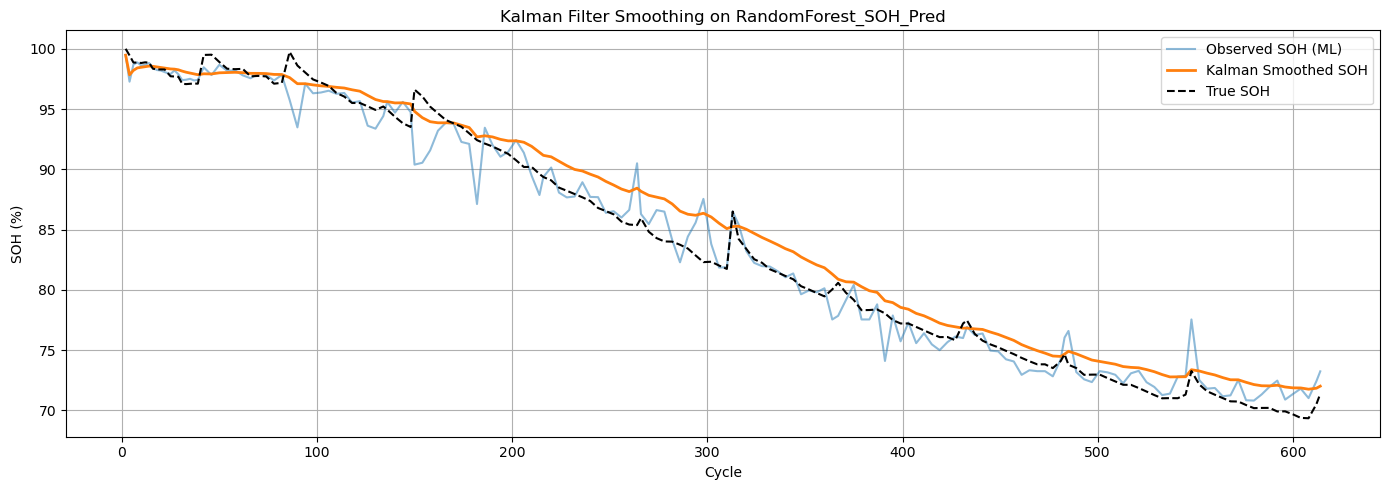

✅ Kalman-smoothed SOH saved to 'B0005_Kalman_smoothed.csv'


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 📂 Load the ML predictions
df = pd.read_csv("B0005_ML_predictions.csv")

# 🎯 Choose which ML output to smooth — can try others later
obs_column = 'RandomForest_SOH_Pred'  # You can switch this to NeuralNetwork or GradientBoosting
observations = df[obs_column].values
n = len(observations)

# ⚙️ Kalman Filter Initialization
Q = 0.006  # Process variance (small, since battery degrades slowly)
R = 0.35     # Measurement variance (based on ML noise)
x_hat = np.zeros(n)  # Posterior estimate of SOH
P = np.zeros(n)      # Posterior error covariance
x_hat[0] = observations[0]  # Initial estimate
P[0] = 1.0           # Initial uncertainty

# 🔁 Apply Kalman Filter
for k in range(1, n):
    # Prediction step
    x_pred = x_hat[k-1]
    P_pred = P[k-1] + Q

    # Update step
    K = P_pred / (P_pred + R)
    x_hat[k] = x_pred + K * (observations[k] - x_pred)
    P[k] = (1 - K) * P_pred

# 📈 Plot smoothed vs observed
plt.figure(figsize=(14, 5))
plt.plot(df['Cycle_Index'], observations, label='Observed SOH (ML)', alpha=0.5)
plt.plot(df['Cycle_Index'], x_hat, label='Kalman Smoothed SOH', linewidth=2)
plt.plot(df['Cycle_Index'], df['SOH (%)'], label='True SOH', color='black', linestyle='--')
plt.xlabel('Cycle')
plt.ylabel('SOH (%)')
plt.title(f'Kalman Filter Smoothing on {obs_column}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 💾 Save smoothed output
df[f'{obs_column}_Kalman'] = x_hat
df.to_csv("B0005_Kalman_smoothed.csv", index=False)
print("✅ Kalman-smoothed SOH saved to 'B0005_Kalman_smoothed.csv'")